# Name : P.Yaswanth Kalyan

# Redg : 17BCD7086

# Slot: D2

# Faculty : Dr. Srinivas Battula

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,roc_auc_score,precision_score,recall_score
from sklearn.metrics import classification_report

In [2]:
train=pd.read_csv("htrain.csv")
test=pd.read_csv("htest.csv")
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [4]:
print('Train Data Shape:{}'.format(train.shape))
print('Test Data Shape:{}'.format(test.shape))

Train Data Shape:(43400, 12)
Test Data Shape:(18601, 11)


In [5]:
df=pd.read_csv("train.csv")

print("Shape of dataset: ")
print(df.shape)
print("Data types of each column:")
print(df.dtypes)
#print(df.describe())
#print(df.describe(include="all"))
missing_data=df.isnull()
print("All the values in dataset whether missing value or not:")
print(missing_data)
print("Total No.of missing values in bmi Column:")
print(df['bmi'].isnull().sum())

Shape of dataset: 
(43400, 12)
Data types of each column:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
All the values in dataset whether missing value or not:
          id  gender    age  hypertension  heart_disease  ever_married  \
0      False   False  False         False          False         False   
1      False   False  False         False          False         False   
2      False   False  False         False          False         False   
3      False   False  False         False          False         False   
4      False   False  False         False          False         False   
...      ...     ...    ...           ...            ...           ...   
43395 

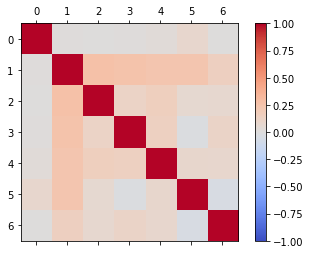

In [79]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

In [6]:
df['bmi']=df['bmi'].replace(" ",np.nan)
df['bmi'] = df['bmi'].fillna(0)
mean=df['bmi'].astype("float").mean(axis=0)
print("Mean of the values is: ")
print(mean)

Mean of the values is: 
27.64143087557628


In [7]:
#print(df)
df['bmi']=df['bmi'].replace(" ",np.nan)
df['bmi'] = df['bmi'].fillna(0)
median=df['bmi'].astype("float").median(axis=0)
print("Median of the values is: ")
print(median)

Median of the values is: 
27.5


In [8]:
df['bmi']=df['bmi'].replace(np.nan,median)
df['bmi']=df['bmi'].replace(" ",np.nan)
#df['bmi'].fillna(df.bmi.mode(), inplace=True)
mode = df['bmi'].mode()[0]
print("Mode of the column is: ")
print(mode)

Mode of the column is: 
0.0


In [9]:
train_missing_values=train.isnull().sum()
train_missing_values

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [10]:
train_data=train.dropna(axis=0,how="any")
test_data=test.dropna(axis=0,how="any")
print('Train Data Shape:{}'.format(train_data.shape))
print('Test Data Shape:{}'.format(test_data.shape))

Train Data Shape:(29072, 12)
Test Data Shape:(12423, 11)


In [11]:
train_data["smoking_status"].unique()

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [12]:
train_data["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [13]:
train_data["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
train_data["stroke"].value_counts()

0    28524
1      548
Name: stroke, dtype: int64

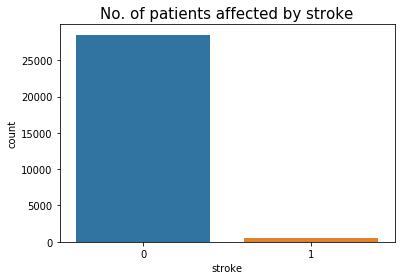

In [15]:
sns.countplot(x=train_data["stroke"])
plt.title("No. of patients affected by stroke",fontsize=15)
plt.show()

In [16]:
train_data["gender"].value_counts()

Female    17852
Male      11213
Other         7
Name: gender, dtype: int64

In [17]:
train_data.groupby(["gender"])["stroke"].value_counts()

gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: stroke, dtype: int64

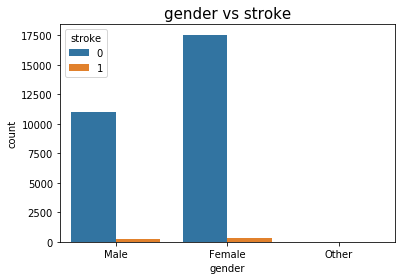

In [18]:
sns.countplot(x=train_data["gender"],hue=train_data["stroke"])
plt.title("gender vs stroke",fontsize=15)
plt.show()

In [19]:
train_data["smoking_status"].value_counts()

never smoked       15747
formerly smoked     7099
smokes              6226
Name: smoking_status, dtype: int64

In [20]:
train_data.groupby(["smoking_status"])["stroke"].value_counts()

smoking_status   stroke
formerly smoked  0          6919
                 1           180
never smoked     0         15491
                 1           256
smokes           0          6114
                 1           112
Name: stroke, dtype: int64

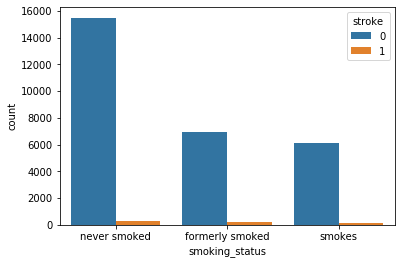

In [21]:
sns.countplot(x=train_data["smoking_status"],hue=train_data["stroke"])
plt.show()

In [22]:

str_data=train_data.select_dtypes(include=['object'])

In [23]:
str_dt=test_data.select_dtypes(include=['object'])

In [24]:
int_data=train_data.select_dtypes(include=['integer','float'])
int_dt=test_data.select_dtypes(include=['integer','float'])

In [25]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [26]:
test1=str_dt.apply(label.fit_transform)
Test=test1.join(int_dt)
Test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


In [27]:
ytrain=features["stroke"]
ytrain.head()

1    0
3    0
6    0
7    0
8    0
Name: stroke, dtype: int64

In [28]:
xtrain=features.drop(["stroke","id"],axis=1)
xtrain.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
1,1,1,2,1,1,58.0,1,0,87.96,39.2
3,0,1,2,0,0,70.0,0,0,69.04,35.9
6,0,1,2,1,0,52.0,0,0,77.59,17.7
7,0,1,3,0,1,75.0,0,1,243.53,27.0
8,0,1,2,0,2,32.0,0,0,77.67,32.3


In [29]:
ytrain=features["stroke"]
ytrain.head()

1    0
3    0
6    0
7    0
8    0
Name: stroke, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain)


In [31]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
12471,0,1,2,1,0,53.0,0,0,104.64,19.0
14415,0,1,2,1,2,53.0,1,0,116.45,20.2
35644,0,0,2,0,1,14.0,0,0,112.95,26.3
21168,1,1,0,0,0,58.0,0,0,236.41,32.3
7832,1,1,0,0,2,47.0,0,0,75.25,30.2


In [32]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
predict=model.predict(x_test)
predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
test_score=model.score(x_test,y_test)
print("NBtest_score:",test_score)

NBtest_score: 0.9229499174463401


# Removing missing values

In [35]:
train=pd.read_csv("train.csv", header=None)
test=pd.read_csv("test.csv", header=None)

print(train.describe())

           0       1      2      3      4      5        6      7      8   \
count   43401   43401  43401  43401  43401  43401    43401  43401  43401   
unique  43401       4    105      3      3      3        6      3  12544   
top     43501  Female     51      0      0    Yes  Private  Urban  82.71   
freq        1   25665    738  39339  41338  27938    24834  21756     19   

           9             10     11  
count   41939         30109  43401  
unique    556             4      3  
top      27.7  never smoked      0  
freq      271         16053  42617  


In [36]:
print(test.describe())

           0       1      2      3      4      5        6      7      8   \
count   18602   18602  18602  18602  18602  18602    18602  18602  18602   
unique  18602       4    105      3      3      3        6      3   8745   
top     68625  Female     78      0      0    Yes  Private  Urban  89.25   
freq        1   10957    307  16868  17707  11939    10750   9310     10   

           9             10  
count   18011         12851  
unique    501             4  
top      25.9  never smoked  
freq      125          6833  


In [37]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30669,Male,3,0,0,No,children,Rural,95.12,18,NaN,0
2,30468,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,16523,Female,8,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,56543,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0


In [38]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1,36306,Male,80,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
2,61829,Female,74,0,1,Yes,Self-employed,Rural,179.5,26,formerly smoked
3,14152,Female,14,0,0,No,children,Rural,95.16,21.2,NaN
4,12997,Male,28,0,0,No,Private,Urban,94.76,23.4,NaN


In [39]:
print(train.shape)

(43401, 12)


In [40]:
# drop rows with missing values
train.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(train.shape)

(29073, 12)


In [41]:
print(test.shape)

(18602, 11)


In [42]:
# drop rows with missing values
test.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(test.shape)

(12424, 11)


In [43]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [44]:
test1=str_dt.apply(label.fit_transform)
Test=test1.join(int_dt)
Test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


In [45]:
xtrain=features.drop(["stroke","id"],axis=1)
xtrain.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
1,1,1,2,1,1,58.0,1,0,87.96,39.2
3,0,1,2,0,0,70.0,0,0,69.04,35.9
6,0,1,2,1,0,52.0,0,0,77.59,17.7
7,0,1,3,0,1,75.0,0,1,243.53,27.0
8,0,1,2,0,2,32.0,0,0,77.67,32.3


In [46]:
ytrain=features["stroke"]
ytrain.head()

1    0
3    0
6    0
7    0
8    0
Name: stroke, dtype: int64

# Naive Bayes

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain)

In [48]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
predict=model.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
test_score=model.score(x_test,y_test)
print("NBtest_score:",test_score)

NBtest_score: 0.9239130434782609


# SVM

In [51]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf",C=0.25,random_state=101)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [52]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7113,    0],
       [ 155,    0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

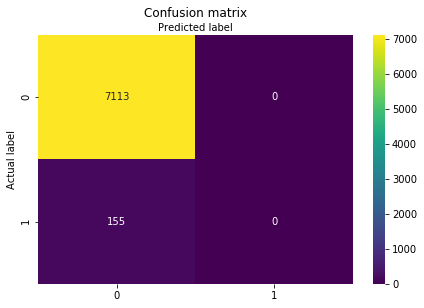

In [53]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
tick_marks = np.arange(2)
plt.xticks(tick_marks, (0,1))
plt.yticks(tick_marks, (0,1))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.978673637864612


# Decision Tree

In [55]:
dt_mod=DecisionTreeClassifier(criterion='entropy',max_depth=8) # using the decisiontree classifier and entropy as a criteia with maximum depth as 8.
dt_mod.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
y_pred=dt_mod.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
ts_dt_score=dt_mod.score(x_test,y_test)
print("DTest_score:",ts_dt_score)

DTest_score: 0.9775729223995597


In [58]:
dt_report=classification_report(y_test,y_pred)
print(dt_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7113
           1       0.21      0.02      0.04       155

    accuracy                           0.98      7268
   macro avg       0.60      0.51      0.51      7268
weighted avg       0.96      0.98      0.97      7268



# KNN

In [59]:

from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test=train_test_split(xtrain,ytrain)

 
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [60]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [61]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9807374793615851


# Neural Networks (MLP)

In [62]:
mlp_model=MLPClassifier()
mlp_model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [63]:
mlp_predict=mlp_model.predict(x_test)
mlp_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
tr_mlp_score=mlp_model.score(x_train,y_train)
print("NNtrain_score:",tr_mlp_score)

NNtrain_score: 0.9809209319390938


In [65]:
ts_mlp_score=mlp_model.score(x_test,y_test)
print("NNtest_score:",ts_mlp_score)

NNtest_score: 0.9818381948266374


In [66]:
from sklearn.model_selection import cross_validate
nn_cv_results=cross_validate(mlp_model,xtrain,ytrain,cv=5)
nn_cv_results

{'fit_time': array([16.99973893, 19.05359173, 15.61745906, 13.10294557, 17.76210809]),
 'score_time': array([0.03124309, 0.03622866, 0.04422998, 0.03124022, 0.03599906]),
 'test_score': array([0.97128117, 0.9810834 , 0.98125215, 0.98125215, 0.98108015])}

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier as rf
rfm = rf(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=30)
rfm.fit(X_train,y_train)
y_pred = rfm.predict(X_test)

In [68]:
model = rf(n_jobs=-1)

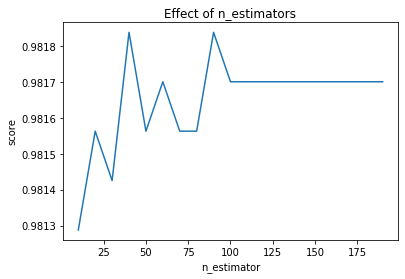

In [69]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [70]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7136,    0],
       [ 132,    0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

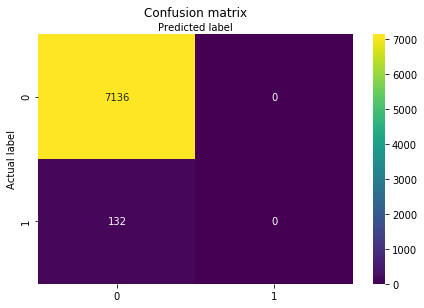

In [71]:
fig, ax = plt.subplots()
tick_marks = np.arange(2)
plt.xticks(tick_marks, (0,1))
plt.yticks(tick_marks, (0,1))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [72]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9818381948266374


# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
from sklearn import metrics

In [75]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7136,    0],
       [ 132,    0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

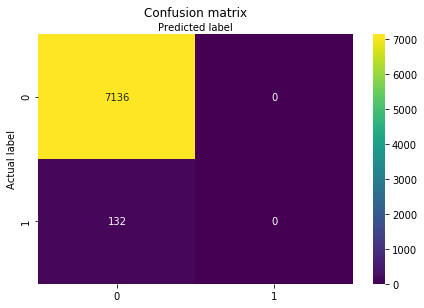

In [76]:
fig, ax = plt.subplots()
tick_marks = np.arange(2)
plt.xticks(tick_marks, (0,1))
plt.yticks(tick_marks, (0,1))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9818381948266374
